In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 1. Membaca dataset
df = pd.read_csv(r'C:\Users\OPTION\Downloads\Python DA\Projects 1_Human Resource Development Analytics Dashboard By Alfin Bahru Rahmika Umar\HR_Analytics - Sheet1.csv')
df

,Number ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,Salary
0,1,0.38,0.53,2,157,3,0,1,0,SALES,LOW
1,2,0.80,0.86,5,262,6,0,1,0,SALES,MEDIUM
2,3,0.11,0.88,7,272,4,0,1,0,SALES,MEDIUM
3,4,0.72,0.87,5,223,5,0,1,0,SALES,LOW
4,5,0.37,0.52,2,159,3,0,1,0,SALES,LOW
...,...,...,...,...,...,...,...,...,...,...,...
14993,14994,0.76,0.83,6,293,6,0,1,0,SUPPORT,LOW
14994,14995,0.40,0.57,2,151,3,0,1,0,SUPPORT,LOW
14995,14996,0.37,0.48,2,160,3,0,1,0,SUPPORT,LOW
14996,14997,0.37,0.53,2,143,3,0,1,0,SUPPORT,LOW


In [24]:
print("Data shape sebelum cleaning:", df.shape)

Data shape sebelum cleaning: (14998, 11)


In [25]:
df.describe()

,Number ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,7499.500000,0.612850,0.716115,3.803174,201.053207,3.498266,0.144619,0.238032,0.021270
std,4329.694004,0.248631,0.171167,1.232546,49.943527,1.460179,0.351728,0.425893,0.144286
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.250000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7499.500000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11248.750000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [26]:
# --- Deteksi Duplikat ---
duplicate_rows = df[df.duplicated()]
print("Jumlah data duplikat:", duplicate_rows.shape[0])

Jumlah data duplikat: 0


In [27]:
# --- Deteksi Missing Values ---
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
Number ID                0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
Salary                   0
dtype: int64


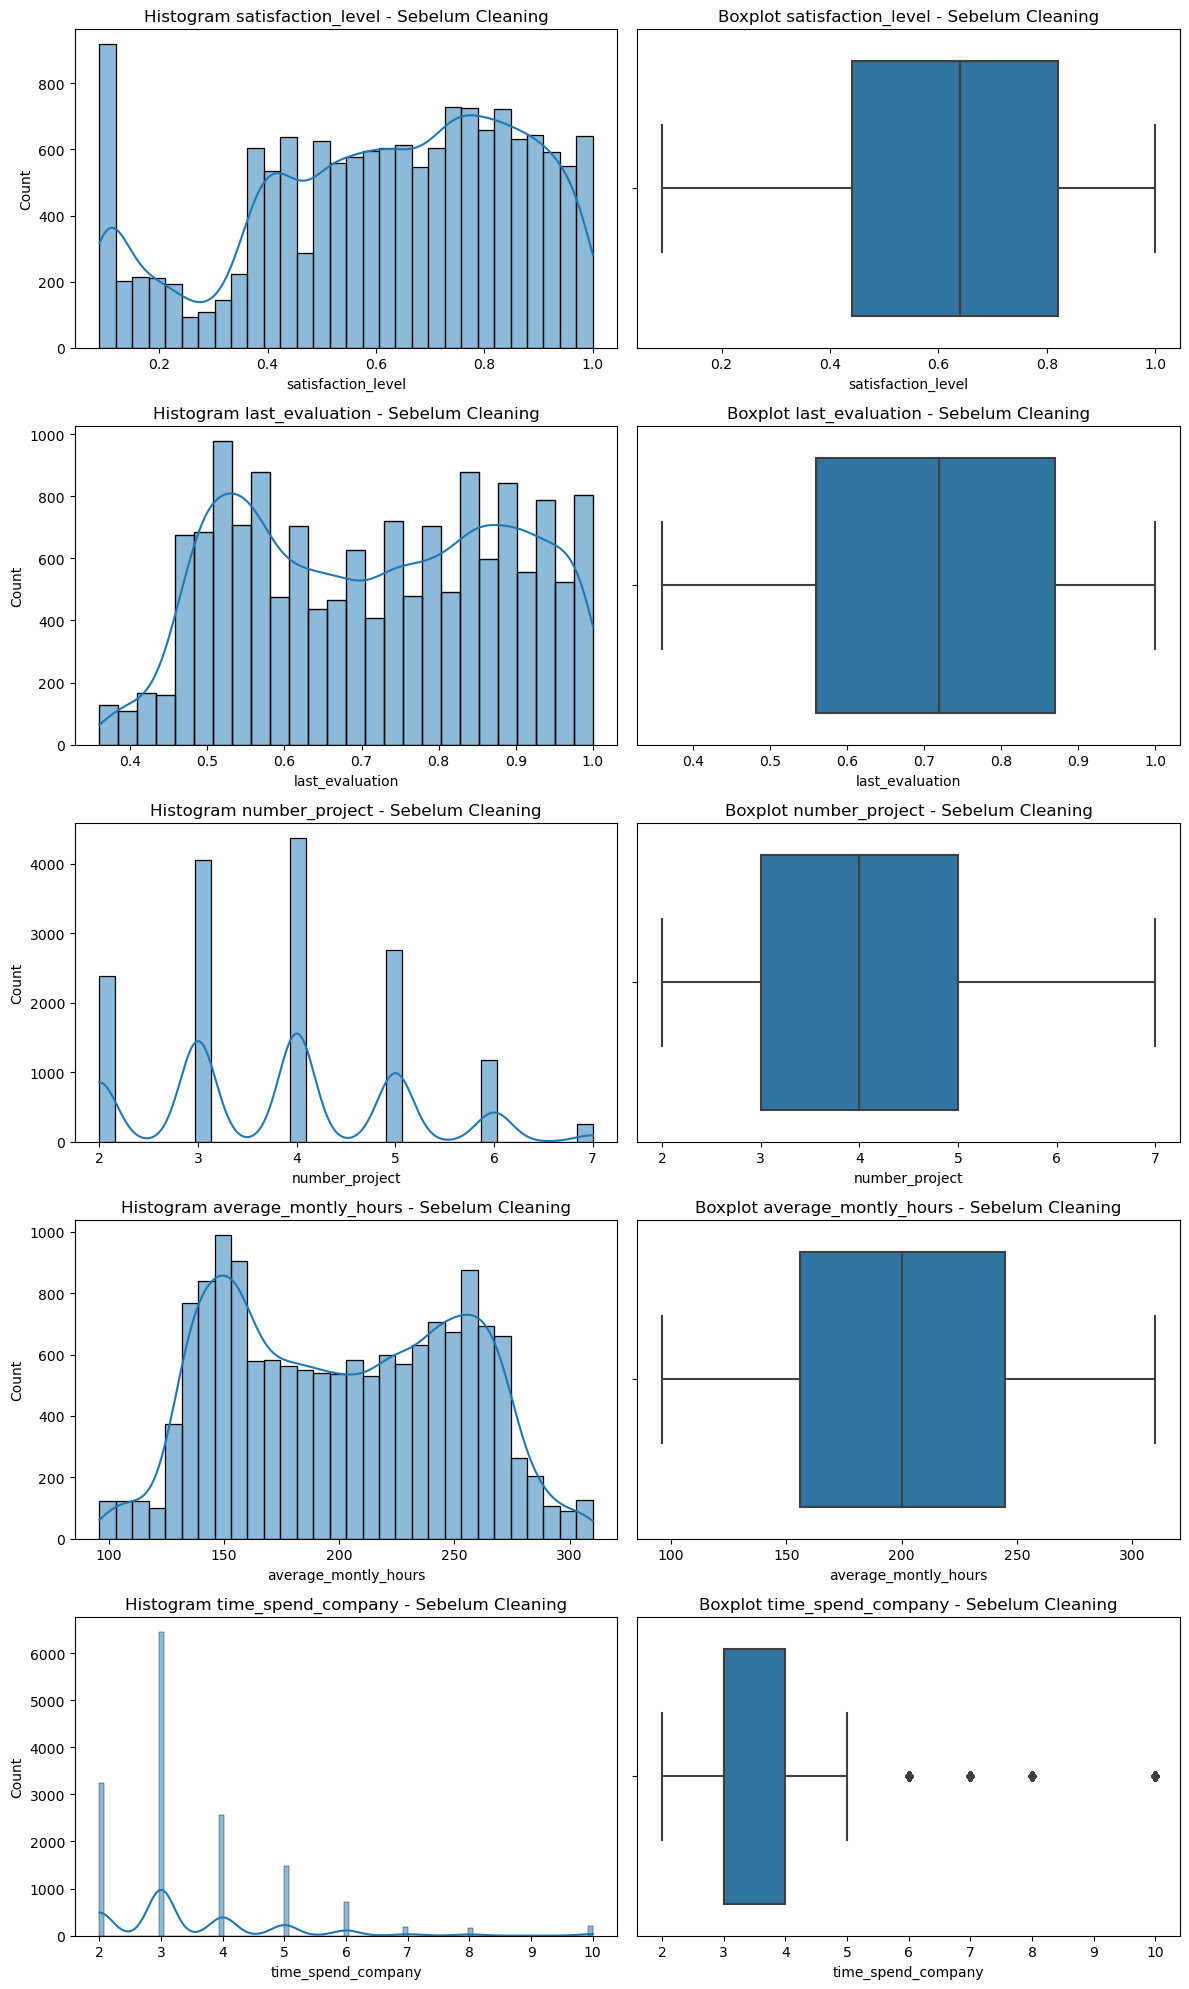

In [28]:
# --- Visualisasi Data Sebelum Cleaning ---
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
fig, axs = plt.subplots(len(numeric_cols), 2, figsize=(12, len(numeric_cols)*4))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'Histogram {col} - Sebelum Cleaning')
    sns.boxplot(x=df[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot {col} - Sebelum Cleaning')
plt.tight_layout()
plt.show()

In [29]:
# --- Simpan Data Asli untuk Perbandingan ---
df_original = df.copy()


In [30]:
# --- Data Cleaning ---
# 1. Hapus duplikat
df_cleaned = df.drop_duplicates()

In [31]:
# 2. Hapus missing values
df_cleaned = df_cleaned.dropna()

In [32]:
# 3. Hapus outliers dengan metode IQR untuk kolom-kolom numeric
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

for col in numeric_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

print("Data shape setelah cleaning:", df_cleaned.shape)

Data shape setelah cleaning: (13716, 11)


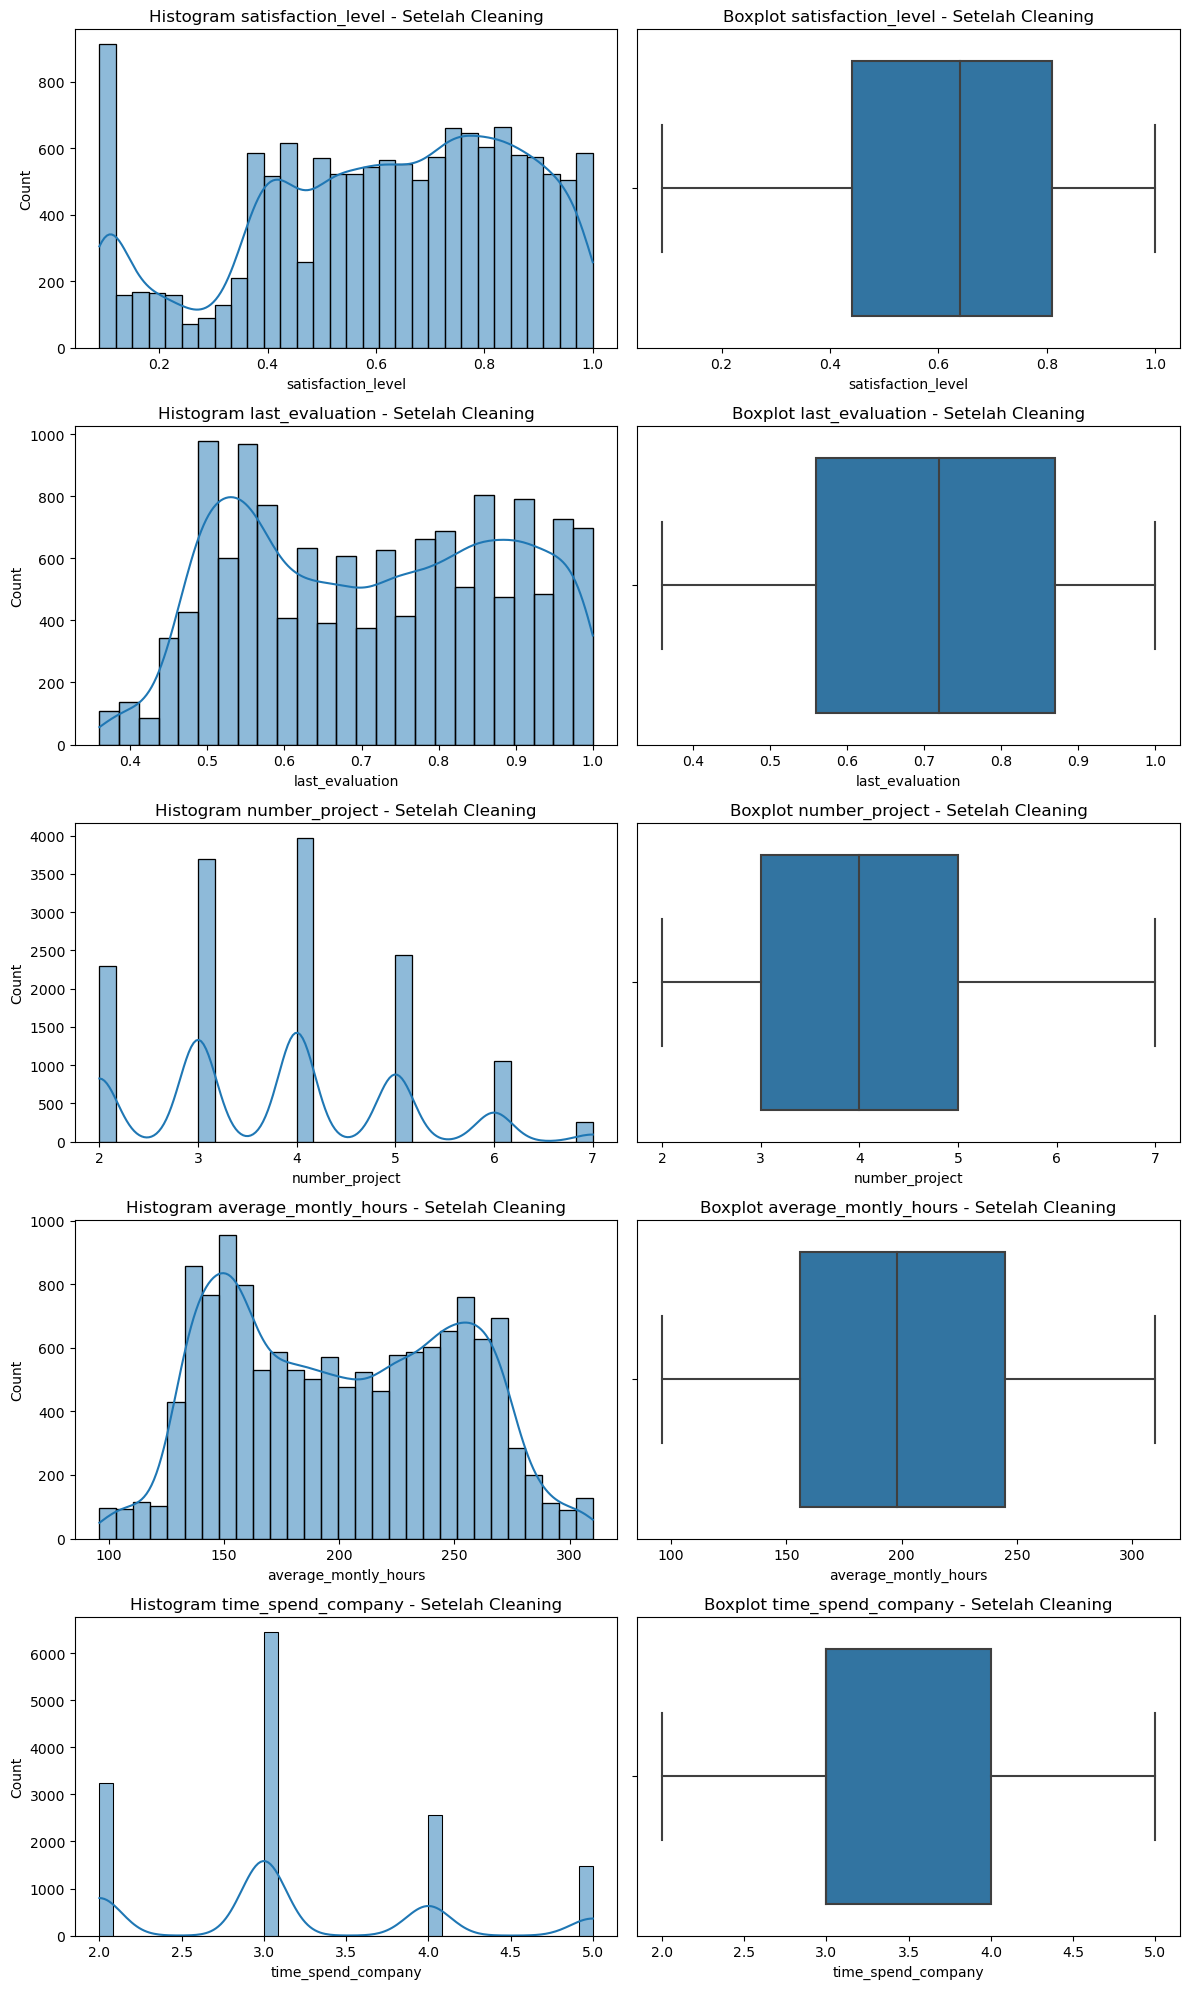

In [33]:
# --- Visualisasi Data Setelah Cleaning ---
fig, axs = plt.subplots(len(numeric_cols), 2, figsize=(12, len(numeric_cols)*4))
for i, col in enumerate(numeric_cols):
    sns.histplot(df_cleaned[col], ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'Histogram {col} - Setelah Cleaning')
    sns.boxplot(x=df_cleaned[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot {col} - Setelah Cleaning')
plt.tight_layout()
plt.show()

# --- Simpan Dataset Cleaned ---
df_cleaned.to_csv('HR_Analytics_CLEANED.csv', index=False)

In [34]:
# --- Hitung Metrik Terukur ---
total_employees = df_cleaned['Number ID'].nunique()
resigned_employees = df_cleaned['left'].sum()
active_employees = total_employees - resigned_employees
resignation_percentage = (resigned_employees / total_employees) * 100
avg_performance = df_cleaned['last_evaluation'].mean() * 100  # dalam persen
avg_satisfaction = df_cleaned['satisfaction_level'].mean() * 100

print("Jumlah Karyawan Aktif:", active_employees)
print("Jumlah Karyawan Resign:", resigned_employees)
print("Persentase Resign: {:.2f}%".format(resignation_percentage))
print("Average Performance Rate: {:.2f}%".format(avg_performance))
print("Average Satisfaction Level: {:.2f}%".format(avg_satisfaction))

Jumlah Karyawan Aktif: 10355
Jumlah Karyawan Resign: 3361
Persentase Resign: 24.50%
Average Performance Rate: 71.44%
Average Satisfaction Level: 61.17%


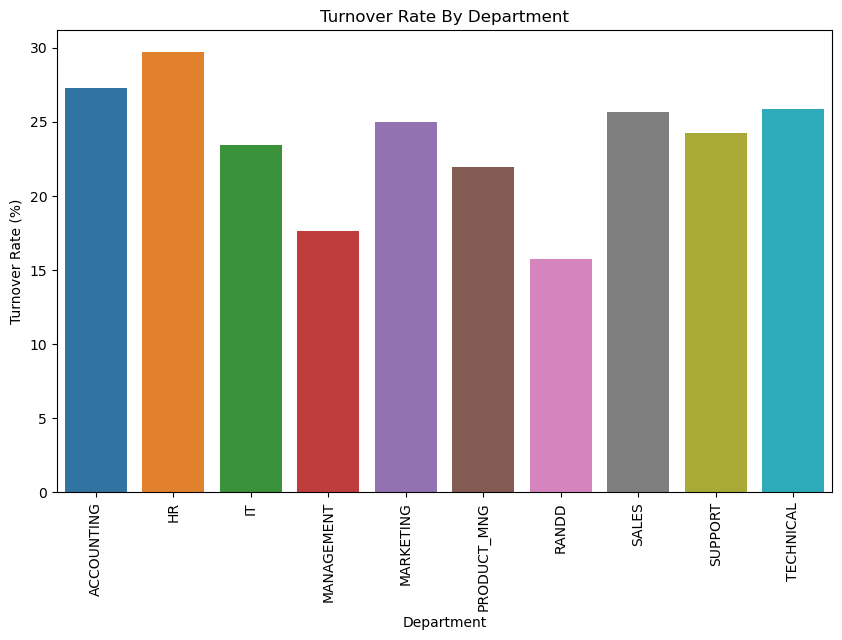

In [35]:
# --- Bar Chart: Turnover Rate By Department ---
turnover_dept = df_cleaned.groupby('Department').agg({
    'left': 'sum',
    'Number ID': 'count'
}).reset_index()
turnover_dept['turnover_rate'] = (turnover_dept['left'] / turnover_dept['Number ID']) * 100

plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='turnover_rate', data=turnover_dept)
plt.title('Turnover Rate By Department')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=90)
plt.show()

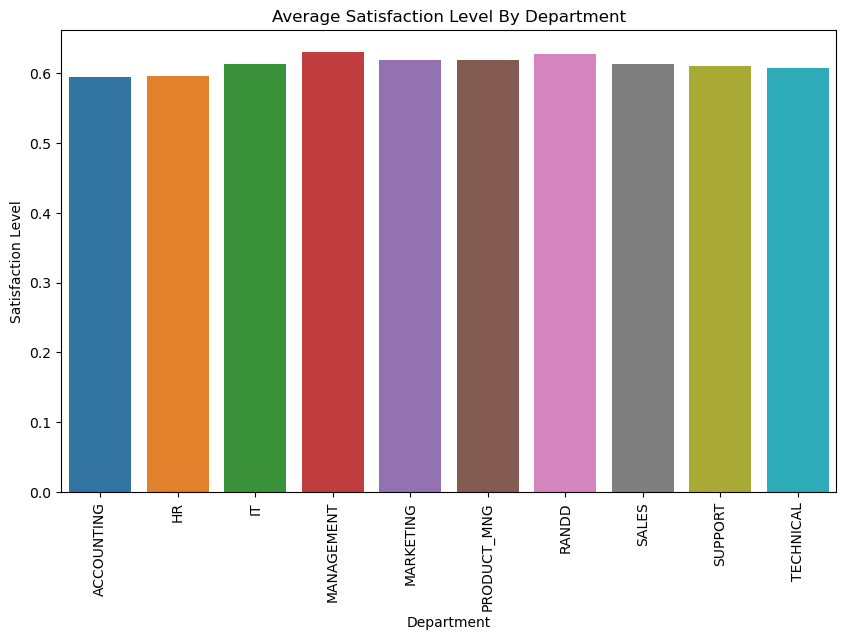

In [36]:
# --- Bar Chart: Average Satisfaction Level By Department ---
satisfaction_dept = df_cleaned.groupby('Department')['satisfaction_level'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='satisfaction_level', data=satisfaction_dept)
plt.title('Average Satisfaction Level By Department')
plt.ylabel('Satisfaction Level')
plt.xticks(rotation=90)
plt.show()

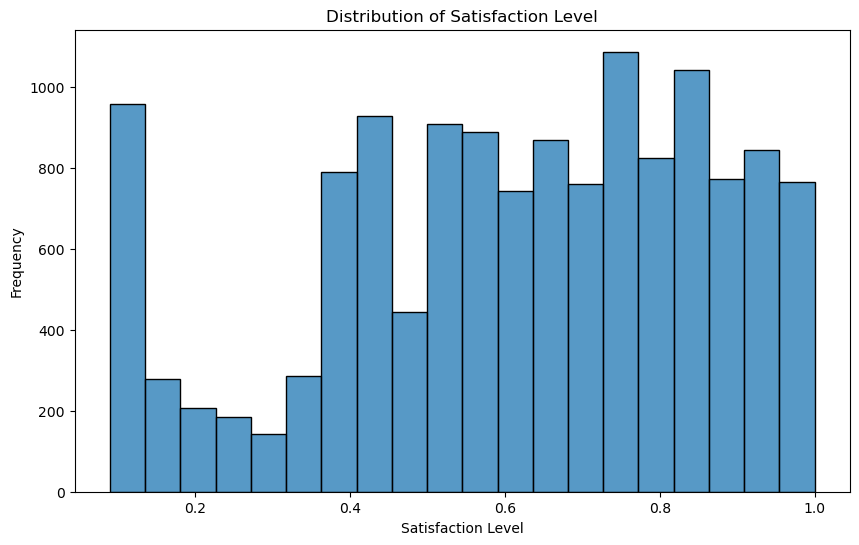

In [37]:
# --- Histogram: Distribution of Satisfaction Level ---
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['satisfaction_level'], bins=20)
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

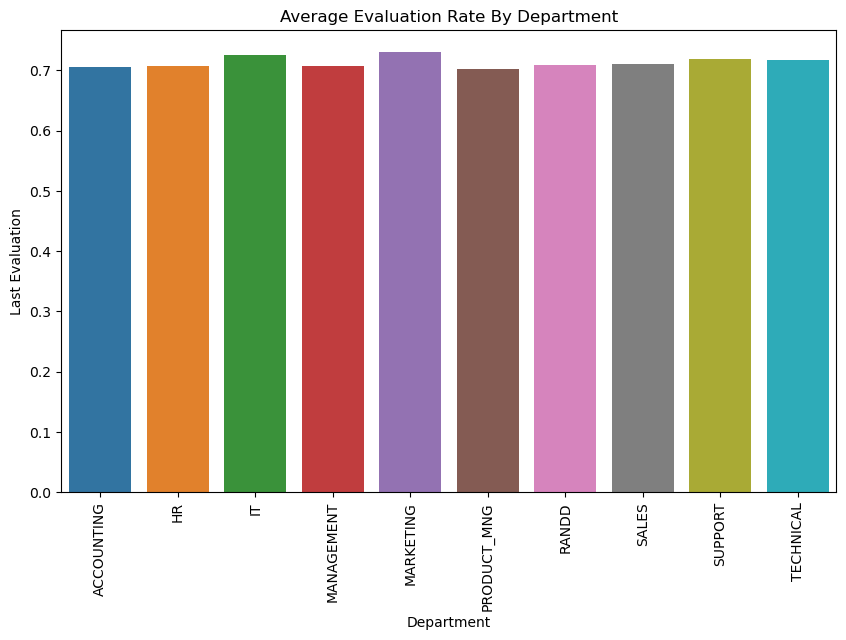

In [38]:
# --- Bar Chart: Average Evaluation Rate By Department ---
evaluation_dept = df_cleaned.groupby('Department')['last_evaluation'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='last_evaluation', data=evaluation_dept)
plt.title('Average Evaluation Rate By Department')
plt.ylabel('Last Evaluation')
plt.xticks(rotation=90)
plt.show()

In [39]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# # Buat figure Plotly dari data yang telah dihitung
# fig_turnover = px.bar(turnover_dept, x='Department', y='turnover_rate',
#                       title='Turnover Rate By Department', labels={'turnover_rate':'Turnover Rate (%)'})
# fig_satisfaction = px.bar(satisfaction_dept, x='Department', y='satisfaction_level',
#                           title='Average Satisfaction Level By Department', labels={'satisfaction_level':'Satisfaction Level'})
# fig_evaluation = px.bar(evaluation_dept, x='Department', y='last_evaluation',
#                         title='Average Evaluation Rate By Department', labels={'last_evaluation':'Last Evaluation'})

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("HR Analytics Dashboard", style={'textAlign': 'center'}),
#     html.Div([
#         html.Div([
#             html.H3("Jumlah Karyawan Aktif"),
#             html.P(active_employees)
#         ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center'}),
#         html.Div([
#             html.H3("Jumlah Karyawan Resign"),
#             html.P(resigned_employees)
#         ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center'}),
#         html.Div([
#             html.H3("Persentase Resign"),
#             html.P(f"{resignation_percentage:.2f}%")
#         ], style={'width': '30%', 'display': 'inline-block', 'textAlign': 'center'}),
#     ], style={'marginBottom': 50}),
#     dcc.Graph(figure=fig_turnover),
#     dcc.Graph(figure=fig_satisfaction),
#     dcc.Graph(figure=fig_evaluation),
#     html.Div([
#         html.H3("Average Performance Rate"),
#         html.P(f"{avg_performance:.2f}%")
#     ], style={'textAlign': 'center', 'marginTop': 30}),
#     html.Div([
#         html.H3("Average Satisfaction Level"),
#         html.P(f"{avg_satisfaction:.2f}%")
#     ], style={'textAlign': 'center', 'marginBottom': 30})
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
